<a href="https://colab.research.google.com/github/sakir101/Assignment-1/blob/main/test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import All Libraries**

In [ ]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import vstack

## **DataSet**

In [ ]:
# Specify the path to your Excel file
excel_file_path = '/content/drive/MyDrive/Career Prediction Research/test3Dataset.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


df.head(4)

,Email,Career,Skill
0,shihab15-14433@diu.edu.bd,Development,"Web Development, Android App Develop"
1,goni15-3930@diu.edu.bd,Security,"Mobile App Development, Research on Cyber Security"
2,tahamid15-3889@diu.edu.bd,Development,"Web Development, Mobile App Development, Game Development, Problem Solving and Analysis"
3,avikgh77@gmail.com,Software Development and Engineering,"Web Development, Mobile App Development, Problem Solving and Analysis, Cybersecurity, Database Development, Artificial Intelligence (AI) and Machine Learning"


In [ ]:
# Shuffle the DataFrame rows
df = df.sample(frac=1, random_state=42)

# Reset the index of the shuffled DataFrame
df = df.reset_index(drop=True)

df.head(4)

,Email,Career,Skill
0,rahat15-4517@diu.edu.bd,Development,"Web Development, Game Development, Problem Solving and Analysis, Database Development"
1,sr6431290@gmail.com,Data Science,"Web Development, Mobile App Development, Artificial Intelligence (AI) and Machine Learning, Database Development, Problem Solving and Analysis, Data Analysis and Visualization, Working with Technology and New Idea Generate"
2,shahriar22205101125@diu.edu.bd,Security,Cybersecurity
3,muhammad15-4452@diu.edu.bd,Development,"Web Development, Game Development"


## **Import nltk, re**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **import stopwords and enlish stopword show**

In [ ]:
stop_words = stopwords.words('english')

## **User defined function to remove stopword and make word lower**

In [ ]:
def remove_stopwords(content):
    con = re.sub('[^a-zA-Z]', ' ', content)
    con = con.lower()
    con = con.split()
    con = [word for word in con if not word in stopwords.words('english')]
    con = ' '.join(con)
    return con

In [ ]:
df['Skill'] = df['Skill'].apply(remove_stopwords)

## **Labelizing career**

In [ ]:
le_x= LabelEncoder()
df.Career = le_x.fit_transform(df.Career)

## **Show decode value**

In [ ]:
unique_classes = le_x.classes_
for label, encoded_value in zip(unique_classes, range(len(unique_classes))):
    print(f"{label} is encoded as {encoded_value}")

Artificial Intelligence is encoded as 0
Data Science is encoded as 1
Development is encoded as 2
Security is encoded as 3
Software Development and Engineering is encoded as 4
User Experience (UX) and User Interface (UI) Design is encoded as 5


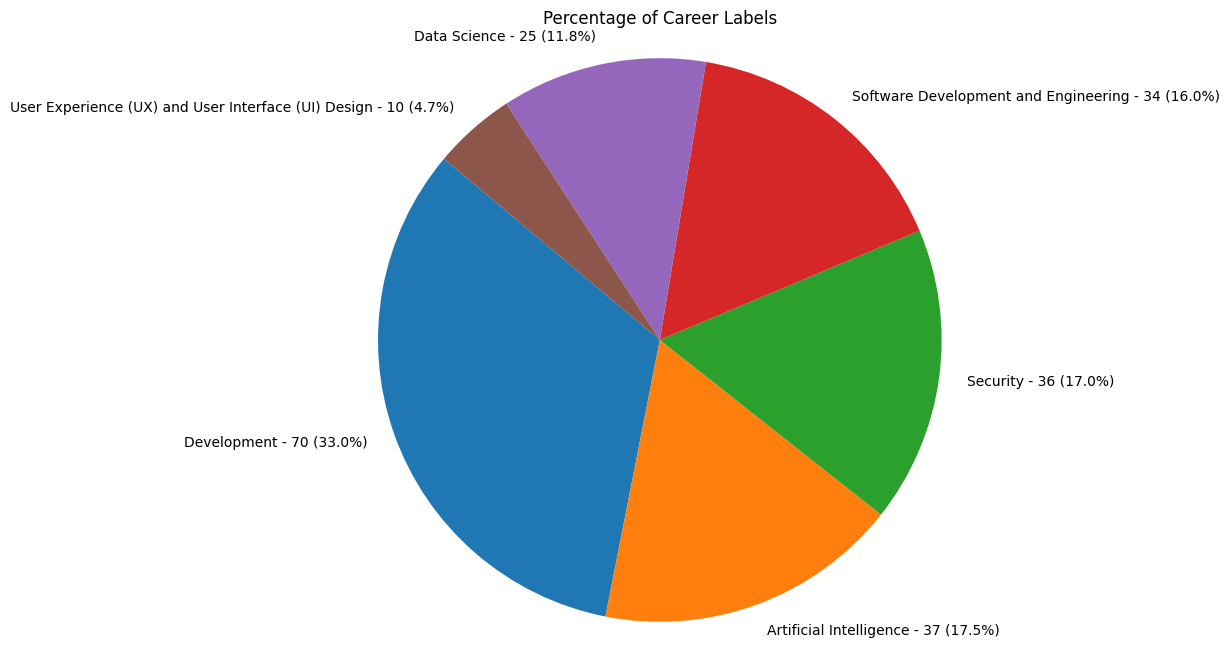

In [ ]:
# Mapping encoded labels to their respective strings
labels = {
    0: 'Artificial Intelligence',
    1: 'Data Science',
    2: 'Development',
    3: 'Security',
    4: 'Software Development and Engineering',
    5: 'User Experience (UX) and User Interface (UI) Design'
}

# Count occurrences of each label
label_counts = df['Career'].value_counts()

# Calculate percentage for each label
percentages = (label_counts / len(df)) * 100

# Generate labels for the pie chart (with count and percentage)
labels_for_plot = [f"{labels[label]} - {label_counts[label]} ({percentages[label]:.1f}%)"
                   for label in label_counts.index]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=labels_for_plot, autopct='', startangle=140)
plt.title('Percentage of Career Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Mapping encoded labels to their respective strings
labels = {
    0: 'Artificial Intelligence',
    1: 'Data Science',
    2: 'Development',
    3: 'Security',
    4: 'Software Development and Engineering',
    5: 'User Experience (UX) and User Interface (UI) Design'
}

# Define the percentages for train-test split
train_percentage = 0.8
test_percentage = 0.2

# Empty DataFrames to store train and test splits
train_data_list = []
test_data_list = []

# Iterate through each class
for label in labels.keys():
    # Filter rows for the current label
    subset = df[df['Career'] == label]

    # Perform train-test split for the subset
    train_subset, test_subset = train_test_split(subset, train_size=train_percentage, test_size=test_percentage, stratify=subset['Career'])

    # Append train and test splits to respective lists
    train_data_list.append(train_subset)
    test_data_list.append(test_subset)

# Concatenate all subsets into final DataFrames
train_data = pd.concat(train_data_list)
test_data = pd.concat(test_data_list)


In [ ]:
# Shuffle the DataFrame rows
train_data = train_data.sample(frac=1, random_state=42)

# Reset the index of the shuffled DataFrame
train_data = train_data.reset_index(drop=True)

# Shuffle the DataFrame rows
test_data = test_data.sample(frac=1, random_state=42)

# Reset the index of the shuffled DataFrame
test_data = test_data.reset_index(drop=True)


# **Taking Input**

In [ ]:
x_train = train_data['Skill']
x_test = test_data['Skill']

## **Taking output class in y**

In [ ]:
y_train = train_data['Career']
y_test = test_data['Career']

## **Apply TfidfVectorizer**

In [ ]:
vect=TfidfVectorizer()
x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, test_size=0.2, stratify=y_train, random_state=42)

In [ ]:
X = vstack((x_train, x_val, x_test))

y = np.concatenate((y_train, y_val, y_test))

## **Apply Decission Tree Classifier**

In [ ]:
x_train_DT = x_train
x_test_DT = x_test
y_train_DT = y_train
y_test_DT = y_test
x_val_DT = x_val
y_val_DT = y_val

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train_DT, y_train_DT)

# Training accuracy
train_predictions = model.predict(x_train_DT)
train_accuracy = accuracy_score(y_train_DT, train_predictions)


# Validation accuracy
val_predictions = model.predict(x_val_DT)
val_accuracy = accuracy_score(y_val_DT, val_predictions)


# Testing accuracy
test_predictions = model.predict(x_test_DT)
test_accuracy = accuracy_score(y_test_DT, test_predictions)

# Cross validation scores
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=rskf, scoring='accuracy')

#AUC-ROC Curve
# Binarize the output labels for multi-class
y_test_bin = label_binarize(y_test_DT, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Predict probabilities for the test set
test_probabilities = model.predict_proba(x_test_DT)

# Calculate the AUC-ROC score for each class
auc_score_DT = roc_auc_score(y_test_bin, test_probabilities, multi_class='ovr')
print(f'AUC-ROC Score_DT: {auc_score_DT}')

print(f'Testing Accuracy: {test_accuracy}')
print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')

# Print the cross-validation scores
print("Repeated Stratified K-Fold Cross-Validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))


NameError: name 'X' is not defined

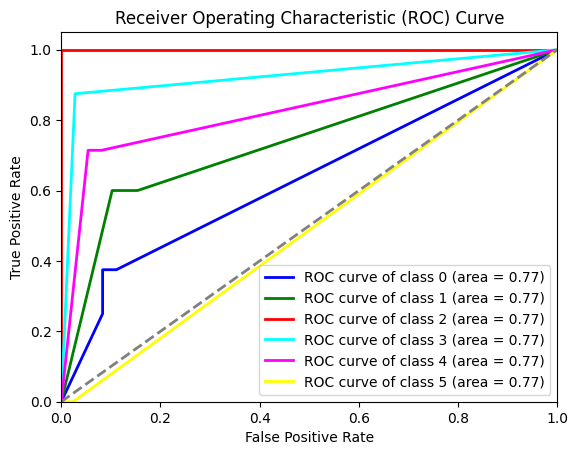

In [ ]:
# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_probabilities[:, i])
    roc_auc[i] = auc_score_DT

# Plot all ROC curves
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



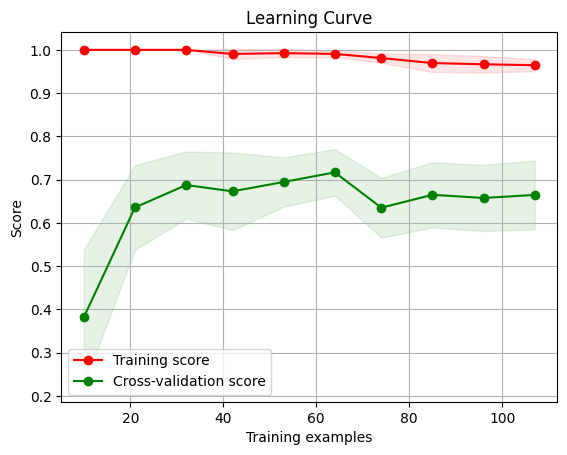

In [ ]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, x_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation scores
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean scores with standard deviation for training and validation scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()



[[ 3  4  0  0  1  0]
 [ 1  3  0  0  0  1]
 [ 0  0 14  0  0  0]
 [ 0  0  0  7  1  0]
 [ 0  1  0  1  5  0]
 [ 2  0  0  0  0  0]]


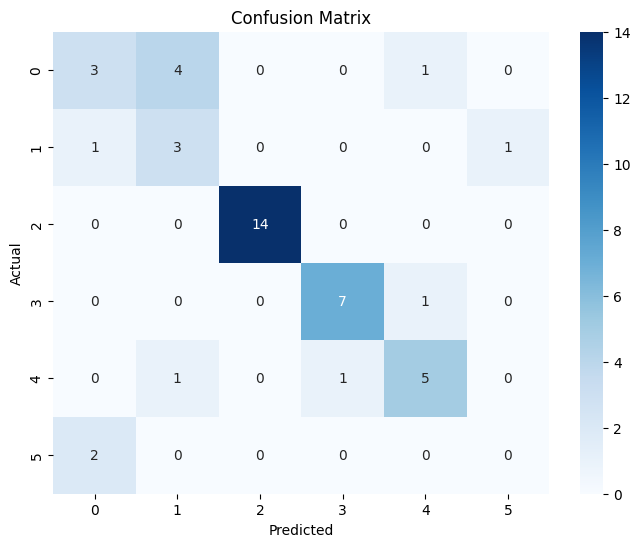

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.38      0.60      0.46         5
           2       1.00      1.00      1.00        14
           3       0.88      0.88      0.88         8
           4       0.71      0.71      0.71         7
           5       0.00      0.00      0.00         2

    accuracy                           0.73        44
   macro avg       0.58      0.59      0.58        44
weighted avg       0.72      0.73      0.72        44



In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, test_predictions)
print("Classification Report:\n", report)

In [ ]:
weighted_metrics = precision_recall_fscore_support(y_test, test_predictions, average='weighted')

# Display the weighted precision, recall, and f1-score
weighted_precision = weighted_metrics[0]
weighted_recall = weighted_metrics[1]
weighted_f1 = weighted_metrics[2]

print(f"Weighted Precision: {weighted_precision}")
print(f"Weighted Recall: {weighted_recall}")
print(f"Weighted F1-Score: {weighted_f1}")

p_dec = round(weighted_precision * 100, 2)
r_dec = round(weighted_recall * 100, 2)
f1_dec = round(weighted_f1 * 100, 2)


Weighted Precision: 0.7244318181818182
Weighted Recall: 0.7272727272727273
Weighted F1-Score: 0.7212787212787213


## **Apply Support Vector**

In [ ]:
# Set the random_state when creating the SVC classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Fit the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the training data
y_train_pred = svm_classifier.predict(x_train)
# Make predictions on the validation data
y_val_pred = svm_classifier.predict(x_val)
# Make predictions on the test data
y_test_pred = svm_classifier.predict(x_test)

# Calculate the accuracy of the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cross-Validation
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(svm_classifier, X, y, cv=rskf, scoring='accuracy')

# AUC-ROC Curve
# Binarize the output labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Predict probabilities for the test set
test_probabilities = svm_classifier.predict_proba(x_test)

# Calculate the AUC-ROC score for each class
auc_score_SVM = roc_auc_score(y_test_bin, test_probabilities, multi_class='ovr')
print(f'AUC-ROC Score_SVM: {auc_score_SVM}')

# Print the cross-validation scores
print("Repeated Stratified K-Fold Cross-Validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)


AUC-ROC Score_SVM: 0.9748926467676468
Repeated Stratified K-Fold Cross-Validation scores: [0.76744186 0.8372093  0.83333333 0.73809524 0.83333333 0.86046512
 0.8372093  0.78571429 0.85714286 0.73809524 0.76744186 0.88372093
 0.66666667 0.88095238 0.76190476 0.8372093  0.76744186 0.83333333
 0.80952381 0.78571429 0.86046512 0.81395349 0.76190476 0.78571429
 0.85714286 0.79069767 0.79069767 0.78571429 0.80952381 0.85714286
 0.81395349 0.79069767 0.83333333 0.83333333 0.78571429 0.74418605
 0.76744186 0.78571429 0.92857143 0.83333333 0.79069767 0.74418605
 0.83333333 0.83333333 0.73809524 0.74418605 0.8372093  0.88095238
 0.78571429 0.83333333]
Mean accuracy: 0.8066445182724253
Standard deviation: 0.04799856491140083
Training Accuracy: 0.8955223880597015
Validation Accuracy: 0.8235294117647058
Testing Accuracy: 0.8863636363636364


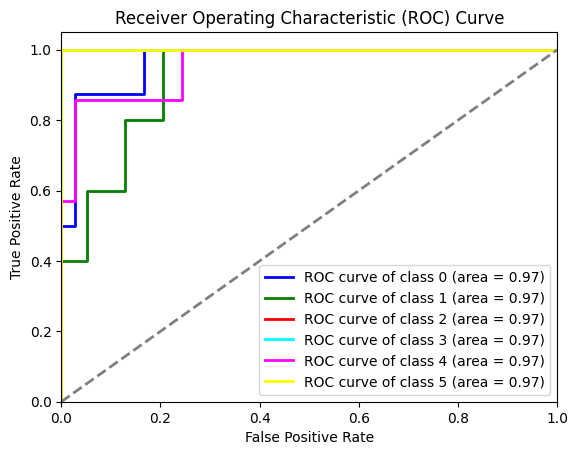

In [ ]:
# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_probabilities[:, i])
    roc_auc[i] = auc_score_SVM

# Plot all ROC curves
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

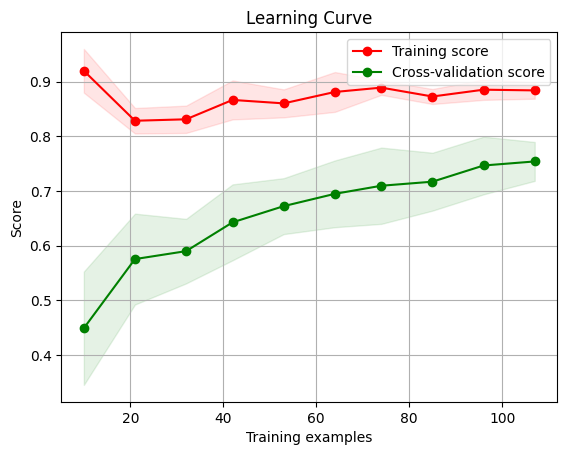

In [ ]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    svm_classifier, x_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation scores
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean scores with standard deviation for training and validation scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


[[ 5  2  0  0  1  0]
 [ 1  4  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  1  0  6  0]
 [ 0  0  0  0  0  2]]


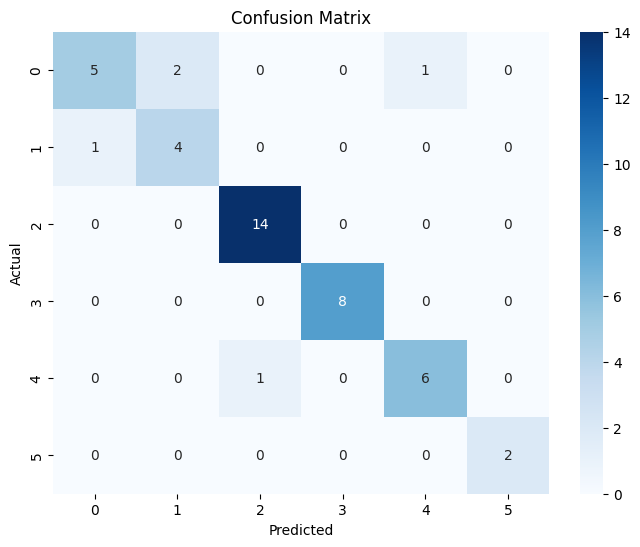

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.67      0.80      0.73         5
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00         2

    accuracy                           0.89        44
   macro avg       0.88      0.88      0.88        44
weighted avg       0.89      0.89      0.88        44



In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)


In [ ]:
weighted_metrics = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

# Display the weighted precision, recall, and f1-score
weighted_precision = weighted_metrics[0]
weighted_recall = weighted_metrics[1]
weighted_f1 = weighted_metrics[2]

print(f"Weighted Precision: {weighted_precision}")
print(f"Weighted Recall: {weighted_recall}")
print(f"Weighted F1-Score: {weighted_f1}")

p_svc = round(weighted_precision * 100, 2)
r_svc = round(weighted_recall * 100, 2)
f1_svc = round(weighted_f1 * 100, 2)

Weighted Precision: 0.8878787878787878
Weighted Recall: 0.8863636363636364
Weighted F1-Score: 0.8833611529536295


## **Apply Logistic Regression**

In [ ]:
# Set the random_state when creating the SVC classifier
logistic_classifier = LogisticRegression(random_state=10)

# Fit the classifier on the training data
logistic_classifier.fit(x_train, y_train)

# Make predictions on the training data
y_train_pred = logistic_classifier.predict(x_train)
# Make predictions on the validation data
y_val_pred = logistic_classifier.predict(x_val)
# Make predictions on the test data
y_test_pred = logistic_classifier.predict(x_test)

# Calculate the accuracy of the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cross-Validation
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(logistic_classifier, X, y, cv=rskf, scoring='accuracy')

# AUC-ROC
# Binarize the output labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Predict probabilities for the test set
test_probabilities = logistic_classifier.predict_proba(x_test)

# Calculate the AUC-ROC score for each class
auc_score_LR = roc_auc_score(y_test_bin, test_probabilities, multi_class='ovr')
print(f'AUC-ROC Score_LR: {auc_score_LR}')

# Print the cross-validation scores
print("Repeated Stratified K-Fold Cross-Validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)

AUC-ROC Score_LR: 0.9721188221188221
Repeated Stratified K-Fold Cross-Validation scores: [0.74418605 0.8372093  0.78571429 0.76190476 0.80952381 0.81395349
 0.8372093  0.80952381 0.76190476 0.78571429 0.76744186 0.8372093
 0.66666667 0.85714286 0.76190476 0.88372093 0.76744186 0.80952381
 0.78571429 0.78571429 0.8372093  0.86046512 0.76190476 0.71428571
 0.83333333 0.81395349 0.72093023 0.80952381 0.83333333 0.83333333
 0.76744186 0.79069767 0.83333333 0.80952381 0.73809524 0.79069767
 0.79069767 0.78571429 0.85714286 0.88095238 0.79069767 0.74418605
 0.83333333 0.83333333 0.76190476 0.72093023 0.8372093  0.83333333
 0.80952381 0.78571429]
Mean accuracy: 0.7976411960132892
Standard deviation: 0.04445296527138345
Training Accuracy: 0.8880597014925373
Validation Accuracy: 0.7647058823529411
Testing Accuracy: 0.8181818181818182


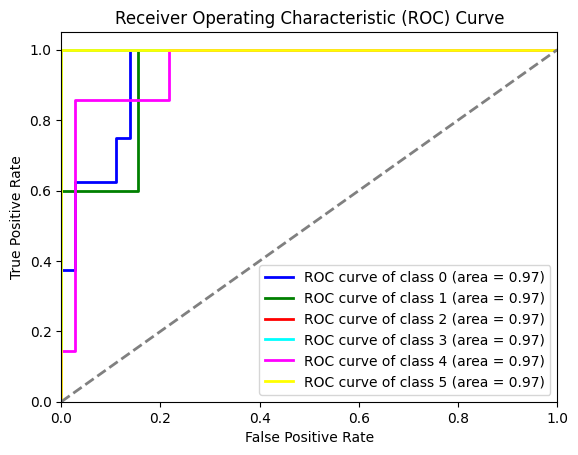

In [ ]:
# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_probabilities[:, i])
    roc_auc[i] = auc_score_LR

# Plot all ROC curves
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[[ 4  3  0  0  1  0]
 [ 1  4  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  3  0  4  0]
 [ 0  0  0  0  0  2]]


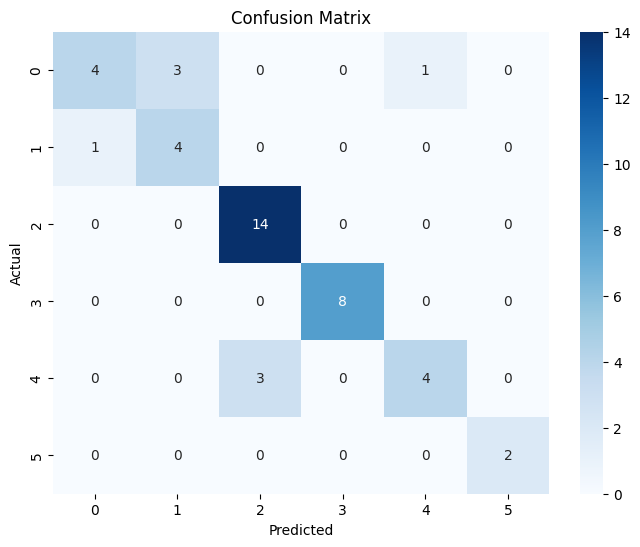

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.57      0.80      0.67         5
           2       0.82      1.00      0.90        14
           3       1.00      1.00      1.00         8
           4       0.80      0.57      0.67         7
           5       1.00      1.00      1.00         2

    accuracy                           0.82        44
   macro avg       0.83      0.81      0.81        44
weighted avg       0.83      0.82      0.81        44



In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

In [ ]:
weighted_metrics = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

# Display the weighted precision, recall, and f1-score
weighted_precision = weighted_metrics[0]
weighted_recall = weighted_metrics[1]
weighted_f1 = weighted_metrics[2]

print(f"Weighted Precision: {weighted_precision}")
print(f"Weighted Recall: {weighted_recall}")
print(f"Weighted F1-Score: {weighted_f1}")

p_lr = round(weighted_precision * 100, 2)
r_lr = round(weighted_recall * 100, 2)
f1_lr = round(weighted_f1 * 100, 2)

Weighted Precision: 0.8269671504965622
Weighted Recall: 0.8181818181818182
Weighted F1-Score: 0.8083690503045342


## **Apply KNN**

In [ ]:
# Set the random_state when creating the SVC classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn_classifier.fit(x_train, y_train)

# Make predictions on the training data
y_train_pred = knn_classifier.predict(x_train)
# Make predictions on the validation data
y_val_pred = knn_classifier.predict(x_val)
# Make predictions on the test data
y_test_pred = knn_classifier.predict(x_test)

# Calculate the accuracy of the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cross-validation
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(knn_classifier, X, y, cv=rskf, scoring='accuracy')

# AUC-ROC
# Binarize the output labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Predict probabilities for the test set
test_probabilities = knn_classifier.predict_proba(x_test)

# Calculate the AUC-ROC score for each class
auc_score_KNN = roc_auc_score(y_test_bin, test_probabilities, multi_class='ovr')
print(f'AUC-ROC Score_KNN: {auc_score_KNN}')

# Print the cross-validation scores
print("Repeated Stratified K-Fold Cross-Validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)

AUC-ROC Score_KNN: 0.9319781491656493
Repeated Stratified K-Fold Cross-Validation scores: [0.74418605 0.6744186  0.85714286 0.71428571 0.78571429 0.79069767
 0.79069767 0.73809524 0.76190476 0.73809524 0.79069767 0.8372093
 0.66666667 0.80952381 0.66666667 0.79069767 0.6744186  0.76190476
 0.76190476 0.78571429 0.8372093  0.81395349 0.69047619 0.71428571
 0.78571429 0.69767442 0.76744186 0.69047619 0.71428571 0.78571429
 0.76744186 0.79069767 0.78571429 0.73809524 0.71428571 0.65116279
 0.76744186 0.76190476 0.85714286 0.78571429 0.76744186 0.76744186
 0.80952381 0.76190476 0.66666667 0.72093023 0.79069767 0.73809524
 0.76190476 0.76190476]
Mean accuracy: 0.756079734219269
Standard deviation: 0.05019986690160895
Training Accuracy: 0.8208955223880597
Validation Accuracy: 0.7941176470588235
Testing Accuracy: 0.8181818181818182


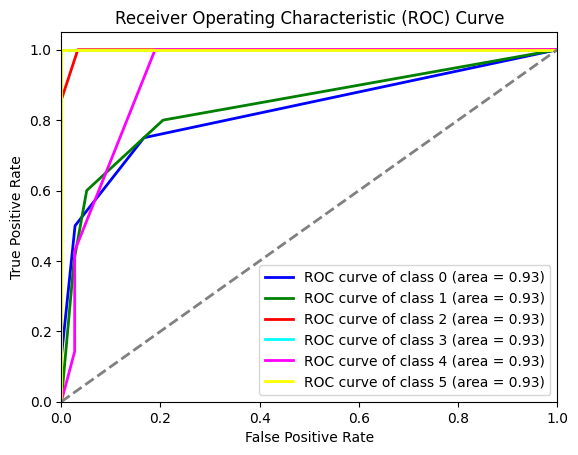

In [ ]:
# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_probabilities[:, i])
    roc_auc[i] = auc_score_KNN

# Plot all ROC curves
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

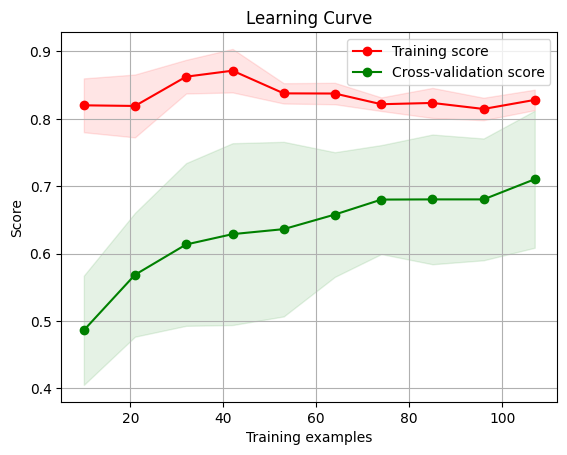

In [ ]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    knn_classifier, x_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation scores
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean scores with standard deviation for training and validation scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

[[ 6  1  0  0  1  0]
 [ 2  3  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 2  1  1  0  3  0]
 [ 0  0  0  0  0  2]]


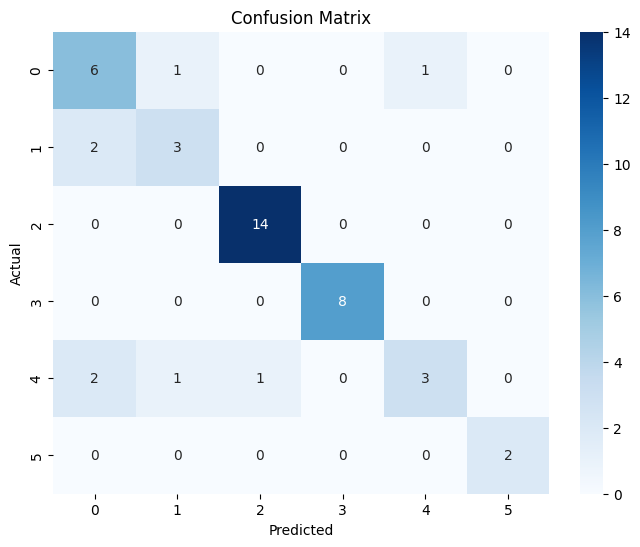

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.60      0.60      0.60         5
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8
           4       0.75      0.43      0.55         7
           5       1.00      1.00      1.00         2

    accuracy                           0.82        44
   macro avg       0.81      0.80      0.80        44
weighted avg       0.82      0.82      0.81        44



In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

In [ ]:
weighted_metrics = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

# Display the weighted precision, recall, and f1-score
weighted_precision = weighted_metrics[0]
weighted_recall = weighted_metrics[1]
weighted_f1 = weighted_metrics[2]

print(f"Weighted Precision: {weighted_precision}")
print(f"Weighted Recall: {weighted_recall}")
print(f"Weighted F1-Score: {weighted_f1}")

p_knn = round(weighted_precision * 100, 2)
r_knn = round(weighted_recall * 100, 2)
f1_knn = round(weighted_f1 * 100, 2)

Weighted Precision: 0.8208333333333333
Weighted Recall: 0.8181818181818182
Weighted F1-Score: 0.8106535575187613


## **Apply Naive Bayes**

In [ ]:
# Set the random_state when creating the SVC classifier
naive_bayes_classifier = MultinomialNB()

# Fit the classifier on the training data
naive_bayes_classifier.fit(x_train, y_train)

# Make predictions on the training data
y_train_pred = naive_bayes_classifier.predict(x_train)
# Make predictions on the validation data
y_val_pred = naive_bayes_classifier.predict(x_val)
# Make predictions on the test data
y_test_pred = naive_bayes_classifier.predict(x_test)

# Calculate the accuracy of the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cross-Validation
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(naive_bayes_classifier, X, y, cv=rskf, scoring='accuracy')

# AUC-Roc
# Binarize the output labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Predict probabilities for the test set
test_probabilities = naive_bayes_classifier.predict_proba(x_test)

# Calculate the AUC-ROC score for each class
auc_score_KNN = roc_auc_score(y_test_bin, test_probabilities, multi_class='ovr')
print(f'AUC-ROC Score_KNN: {auc_score_KNN}')

# Print the cross-validation scores
print("Repeated Stratified K-Fold Cross-Validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)

AUC-ROC Score_KNN: 0.9628818035068035
Repeated Stratified K-Fold Cross-Validation scores: [0.72093023 0.81395349 0.80952381 0.73809524 0.83333333 0.86046512
 0.79069767 0.80952381 0.71428571 0.76190476 0.76744186 0.79069767
 0.66666667 0.83333333 0.76190476 0.79069767 0.72093023 0.78571429
 0.78571429 0.76190476 0.8372093  0.81395349 0.76190476 0.73809524
 0.85714286 0.79069767 0.74418605 0.76190476 0.83333333 0.80952381
 0.76744186 0.76744186 0.83333333 0.76190476 0.73809524 0.79069767
 0.72093023 0.78571429 0.78571429 0.80952381 0.76744186 0.72093023
 0.78571429 0.78571429 0.76190476 0.79069767 0.8372093  0.80952381
 0.78571429 0.78571429]
Mean accuracy: 0.781140642303433
Standard deviation: 0.03962053221959288
Training Accuracy: 0.8283582089552238
Validation Accuracy: 0.7647058823529411
Testing Accuracy: 0.7727272727272727


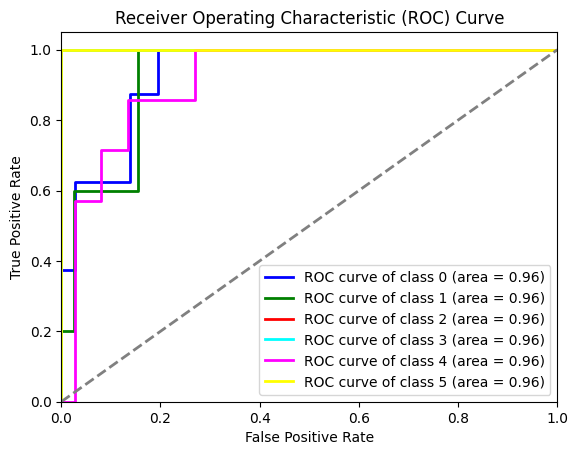

In [ ]:
# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_probabilities[:, i])
    roc_auc[i] = auc_score_KNN

# Plot all ROC curves
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

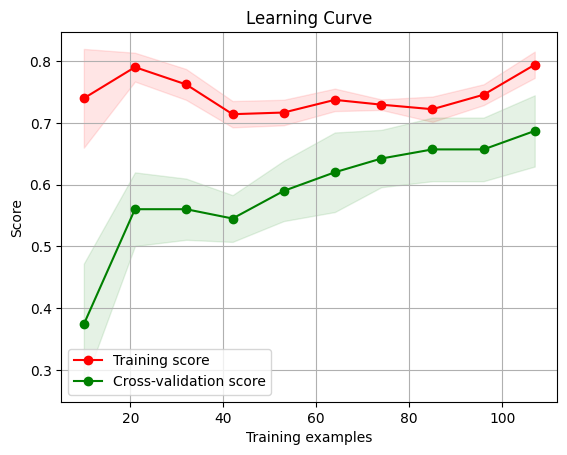

In [ ]:
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    naive_bayes_classifier, x_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation scores
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean scores with standard deviation for training and validation scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

[[ 5  2  0  0  1  0]
 [ 2  2  0  0  1  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  3  0  4  0]
 [ 0  0  1  0  0  1]]


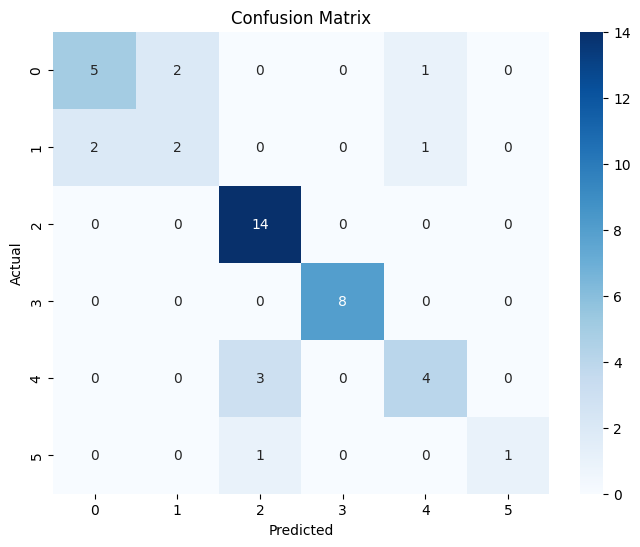

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.50      0.40      0.44         5
           2       0.78      1.00      0.88        14
           3       1.00      1.00      1.00         8
           4       0.67      0.57      0.62         7
           5       1.00      0.50      0.67         2

    accuracy                           0.77        44
   macro avg       0.78      0.68      0.71        44
weighted avg       0.77      0.77      0.76        44



In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

In [ ]:
weighted_metrics = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

# Display the weighted precision, recall, and f1-score
weighted_precision = weighted_metrics[0]
weighted_recall = weighted_metrics[1]
weighted_f1 = weighted_metrics[2]

print(f"Weighted Precision: {weighted_precision}")
print(f"Weighted Recall: {weighted_recall}")
print(f"Weighted F1-Score: {weighted_f1}")

p_nb = round(weighted_precision * 100, 2)
r_nb = round(weighted_recall * 100, 2)
f1_nb = round(weighted_f1 * 100, 2)

Weighted Precision: 0.7674963924963926
Weighted Recall: 0.7727272727272727
Weighted F1-Score: 0.7601495726495727


## **Import Necessary Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Dropout, GlobalMaxPooling1D, Reshape
from keras.optimizers import Adam
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
# Set a random seed for reproducibility
# Set seeds for reproducibility
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)


## **CNN Model**

In [ ]:
x_train_CNN = x_train
x_test_CNN = x_test
y_train_CNN = y_train
y_test_CNN = y_test

In [ ]:
# Reshape data for CNN (assuming a 1D convolution)
x_train_all_CNN = x_train_CNN.toarray().reshape(x_train_CNN.shape[0], x_train_CNN.shape[1], 1)
x_test_all_CNN = x_test_CNN.toarray().reshape(x_test_CNN.shape[0], x_test_CNN.shape[1], 1)


x_train_all_CNN, x_val_all_CNN, y_train_CNN, y_val_CNN = train_test_split(x_train_all_CNN, y_train_CNN, test_size=0.2, random_state=42, stratify=y_train)

# Define batch size
batch_size = 32

In [ ]:
x_all_CNN = np.concatenate((x_train_all_CNN, x_test_all_CNN), axis=0)
y_all_CNN = np.concatenate((y_train_CNN, y_test_CNN), axis=0)

In [ ]:
# Define the CNN model
cnn_model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(x_train_all_CNN.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train_CNN)), activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_CNN = cnn_model.fit(x_train_all_CNN, y_train_CNN, epochs=50, batch_size=32, validation_data=(x_val_all_CNN, y_val_CNN))


# Print train accuracy
train_accuracy = history_CNN.history['accuracy'][-1]
print(f'Train Accuracy: {train_accuracy:.4f}')

# Evaluate on the validation set
val_loss, val_accuracy = cnn_model.evaluate(x_val_all_CNN, y_val_CNN)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Evaluate on the test set
test_loss, test_accuracy = cnn_model.evaluate(x_test_all_CNN, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate AUC-ROC on the test set
y_pred_proba = cnn_model.predict(x_test_all_CNN)
auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f'AUC-ROC: {auc_roc:.4f}')

# Cross-validation using Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracies = []

for train_index, val_index in skf.split(x_all_CNN, y_all_CNN):
    x_train_cv, x_val_cv = x_all_CNN[train_index], x_all_CNN[val_index]
    y_train_cv, y_val_cv = y_all_CNN[train_index], y_all_CNN[val_index]

    model = Sequential([
        Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(x_train_cv.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(len(np.unique(y_train_cv)), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train_cv, y_train_cv, epochs=50, batch_size=32, verbose=0)

    val_loss_cv, val_accuracy_cv = model.evaluate(x_val_cv, y_val_cv, verbose=0)
    cross_val_accuracies.append(val_accuracy_cv)

mean_cross_val_accuracy = np.mean(cross_val_accuracies)
print(f'Cross-Validation Accuracy: {mean_cross_val_accuracy:.4f}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.2983 - loss: 1.7734 - val_accuracy: 0.6296 - val_loss: 1.6904
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5614 - loss: 1.6686 - val_accuracy: 0.6296 - val_loss: 1.5751
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5570 - loss: 1.5405 - val_accuracy: 0.5926 - val_loss: 1.4353
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4994 - loss: 1.4233 - val_accuracy: 0.6296 - val_loss: 1.3147
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5599 - loss: 1.3095 - val_accuracy: 0.7037 - val_loss: 1.2157
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6896 - loss: 1.1626 - val_accuracy: 0.7407 - val_loss: 1.1332
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6548 - loss: 1.0620 - val_accuracy: 0.7407 - val_loss: 1.0692
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6748 - loss: 1.0392 - val_accuracy: 0.7037 - val_loss: 1.0109
Epoch 9/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation Accuracy: 0.7948


In [ ]:
# # Define the CNN model
# def create_cnn_model(input_shape, num_classes):
#     model = Sequential()
#     model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Dropout(0.5))
#     model.add(Flatten())
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation='softmax'))
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Parameters
# num_classes = len(np.unique(y_all))
# batch_size = 32
# epochs = 50
# n_splits = 5
# n_repeats = 2
# input_shape = (x_all.shape[1], 1)

# # Repeated Stratified K-Fold Cross-Validation
# rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
# fold_no = 1
# scores = []

# for train_index, val_index in rskf.split(x_all, y_all):
#     x_train_fold, x_val_fold = x_all[train_index], x_all[val_index]
#     y_train_fold, y_val_fold = y_all_cat[train_index], y_all_cat[val_index]

#     # Create a new instance of the CNN model
#     model = create_cnn_model(input_shape, num_classes)

#     # Train the CNN model
#     history = model.fit(x_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, validation_data=(x_val_fold, y_val_fold), verbose=1)

#     # Evaluate the model on the validation set
#     val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
#     print(f'Fold {fold_no} Validation Accuracy: {val_accuracy}')
#     scores.append(val_accuracy)
#     fold_no += 1

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(x_test_all, y_test_cat, verbose=0)
# print(f'CNN Model Test Accuracy: {test_accuracy}')

# # Print the average accuracy over all folds
# print(f'Average Cross-Validation Accuracy: {np.mean(scores)}')
# print(f'Standard Deviation of Cross-Validation Accuracy: {np.std(scores)}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.2852 - loss: 1.7763 - val_accuracy: 0.5161 - val_loss: 1.7091
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4748 - loss: 1.6710 - val_accuracy: 0.5484 - val_loss: 1.5887
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5665 - loss: 1.5198 - val_accuracy: 0.4839 - val_loss: 1.4469
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4927 - loss: 1.3753 - val_accuracy: 0.5484 - val_loss: 1.3381
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5633 - loss: 1.2580 - val_accuracy: 0.5806 - val_loss: 1.2249
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6000 - loss: 1.1856 - val_accuracy: 0.6452 - val_loss: 1.1279
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6596 - loss: 1.0895 - val_accuracy: 0.6774 - val_loss: 1.0344
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6829 - loss: 0.9851 - val_accuracy: 0.7097 - val_loss: 0.9510
Epoch 9/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.2846 - loss: 1.7793 - val_accuracy: 0.5806 - val_loss: 1.7084
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5998 - loss: 1.6765 - val_accuracy: 0.6129 - val_loss: 1.6018
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6204 - loss: 1.5588 - val_accuracy: 0.5484 - val_loss: 1.4693
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6298 - loss: 1.3889 - val_accuracy: 0.5484 - val_loss: 1.3330
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5813 - loss: 1.2650 - val_accuracy: 0.5806 - val_loss: 1.2179
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5867 - loss: 1.1665 - val_accuracy: 0.6129 - val_loss: 1.1064
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6650 - loss: 1.0946 - val_accuracy: 0.6774 - val_loss: 1.0135
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7081 - loss: 1.0082 - val_accuracy: 0.7097 - val_loss: 0.9320
Epoch 9/50


In [ ]:
# # Define the CNN model
# cnn_model = Sequential()
# cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(x_train_all.shape[1], 1)))
# cnn_model.add(MaxPooling1D(pool_size=2))
# cnn_model.add(Dropout(0.5))
# cnn_model.add(Flatten())
# cnn_model.add(Dense(64, activation='relu'))
# cnn_model.add(Dropout(0.5))
# num_classes = len(np.unique(y_train))
# cnn_model.add(Dense(num_classes, activation='softmax'))

# # Compile the CNN model
# cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# history = cnn_model.fit(x_train_all, y_train, epochs=50, batch_size=32, validation_data=(x_val_all, y_val))
# # Train the CNN model
# cnn_model.fit(x_train_all, y_train, epochs=50, batch_size=batch_size, validation_data=(x_val_all, y_val))

# # Evaluate the CNN model on the test set
# test_loss, test_accuracy = cnn_model.evaluate(x_test_all, y_test)
# print(f'CNN Model Test Accuracy: {test_accuracy}')

# # Extract training and validation accuracy from the history
# train_accuracy = history.history['accuracy'][-1]
# val_accuracy = history.history['val_accuracy'][-1]

# print(f'CNN Model Training Accuracy: {train_accuracy}')
# print(f'CNN Model Validation Accuracy: {val_accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 332ms/step - accuracy: 0.2669 - loss: 1.7771 - val_accuracy: 0.4815 - val_loss: 1.7026
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5481 - loss: 1.6733 - val_accuracy: 0.5556 - val_loss: 1.5651
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5628 - loss: 1.5124 - val_accuracy: 0.5556 - val_loss: 1.4165
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5464 - loss: 1.3894 - val_accuracy: 0.5926 - val_loss: 1.2974
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5606 - loss: 1.2966 - val_accuracy: 0.6667 - val_loss: 1.1890
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6203 - loss: 1.1894 - val_accuracy: 0.7037 - val_loss: 1.1138
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6985 - loss: 1.0561 - val_accuracy: 0.7037 - val_loss: 1.0434
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6421 - loss: 1.0615 - val_accuracy: 0.7407 - val_loss: 0.9827

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# from sklearn.model_selection import StratifiedKFold, train_test_split
# from keras.utils import to_categorical
# from sklearn.metrics import accuracy_score

# # Define the number of splits and repeats
# n_splits = 5
# n_repeats = 2

# # Prepare to store the results
# fold_accuracies = []
# fold_val_accuracies = []
# fold_train_accuracies = []

# # Define the StratifiedKFold
# kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Start the cross-validation process
# for train_index, val_index in kf.split(x_train_all, y_train):
#     x_train_fold, x_val_fold = x_train_all[train_index], x_train_all[val_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

#     # Define the CNN model
#     cnn_model = Sequential()
#     cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(x_train_all.shape[1], 1)))
#     cnn_model.add(MaxPooling1D(pool_size=2))
#     cnn_model.add(Dropout(0.5))
#     cnn_model.add(Flatten())
#     cnn_model.add(Dense(64, activation='relu'))
#     cnn_model.add(Dropout(0.5))
#     num_classes = len(np.unique(y_train))
#     cnn_model.add(Dense(num_classes, activation='softmax'))

#     # Compile the CNN model
#     cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     # Train the CNN model
#     history = cnn_model.fit(x_train_fold, y_train_fold, epochs=50, batch_size=32, validation_data=(x_val_fold, y_val_fold), verbose=0)

#     # Evaluate the CNN model on the validation fold
#     val_loss, val_accuracy = cnn_model.evaluate(x_val_fold, y_val_fold, verbose=0)
#     fold_val_accuracies.append(val_accuracy)

#     # Evaluate the CNN model on the training fold to record training accuracy
#     train_loss, train_accuracy = cnn_model.evaluate(x_train_fold, y_train_fold, verbose=0)
#     fold_train_accuracies.append(train_accuracy)

#     # Record the final training accuracy
#     fold_accuracies.append(history.history['accuracy'][-1])

# # Evaluate the final model on the test set
# test_loss, test_accuracy = cnn_model.evaluate(x_test_all, y_test, verbose=0)

# # Calculate average accuracies
# average_train_accuracy = np.mean(fold_train_accuracies)
# average_val_accuracy = np.mean(fold_val_accuracies)

# print(f'CNN Model Test Accuracy: {test_accuracy}')
# print(f'CNN Model Average Training Accuracy: {average_train_accuracy}')
# print(f'CNN Model Average Validation Accuracy: {average_val_accuracy}')
# print(f'CNN Model Mean Cross-Validation Accuracy: {np.mean(fold_accuracies)}')

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
# from keras.utils import to_categorical

# # Assuming x_train, x_test, y_train, y_test are already defined and preprocessed

# # Reshape data for CNN (assuming a 1D convolution)
# x_train_all = x_train.toarray().reshape(x_train.shape[0], x_train.shape[1], 1)
# x_test_all = x_test.toarray().reshape(x_test.shape[0], x_test.shape[1], 1)

# # Define batch size
# batch_size = 32
# num_classes = len(np.unique(y_train))

# # Initialize Repeated Stratified K-Fold
# n_splits = 5
# n_repeats = 3
# rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# # Store the results
# train_accuracies = []
# val_accuracies = []
# test_accuracies = []

# # Perform Repeated Stratified K-Fold Cross-Validation
# for train_index, val_index in rskf.split(x_train_all, y_train):
#     x_train_fold, x_val_fold = x_train_all[train_index], x_train_all[val_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

#     # Define the CNN model
#     cnn_model = Sequential()
#     cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(x_train_all.shape[1], 1)))
#     cnn_model.add(MaxPooling1D(pool_size=2))
#     cnn_model.add(Dropout(0.5))
#     cnn_model.add(Flatten())
#     cnn_model.add(Dense(64, activation='relu'))
#     cnn_model.add(Dropout(0.5))
#     cnn_model.add(Dense(num_classes, activation='softmax'))

#     # Compile the CNN model
#     cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     # Train the CNN model
#     history = cnn_model.fit(x_train_fold, y_train_fold, epochs=50, batch_size=batch_size, validation_data=(x_val_fold, y_val_fold), verbose=0)

#     # Evaluate the model on the validation set
#     val_loss, val_accuracy = cnn_model.evaluate(x_val_fold, y_val_fold, verbose=0)
#     val_accuracies.append(val_accuracy)

#     # Evaluate the model on the training set (for reference)
#     train_loss, train_accuracy = cnn_model.evaluate(x_train_fold, y_train_fold, verbose=0)
#     train_accuracies.append(train_accuracy)

#     # Evaluate the model on the test set (optional, to see generalization performance)
#     test_loss, test_accuracy = cnn_model.evaluate(x_test_all, y_test, verbose=0)
#     test_accuracies.append(test_accuracy)

# # Calculate and print mean and standard deviation of accuracies
# mean_train_accuracy = np.mean(train_accuracies)
# std_train_accuracy = np.std(train_accuracies)
# mean_val_accuracy = np.mean(val_accuracies)
# std_val_accuracy = np.std(val_accuracies)
# mean_test_accuracy = np.mean(test_accuracies)
# std_test_accuracy = np.std(test_accuracies)

# print(f'Training Accuracies: {train_accuracies}')
# print(f'Validation Accuracies: {val_accuracies}')
# print(f'Test Accuracies: {test_accuracies}')

# print(f'\nMean Training Accuracy: {mean_train_accuracy:.4f}')
# print(f'Standard Deviation of Training Accuracy: {std_train_accuracy:.4f}')
# print(f'\nMean Validation Accuracy: {mean_val_accuracy:.4f}')
# print(f'Standard Deviation of Validation Accuracy: {std_val_accuracy:.4f}')
# print(f'\nMean Test Accuracy: {mean_test_accuracy:.4f}')
# print(f'Standard Deviation of Test Accuracy: {std_test_accuracy:.4f}')


ValueError: Found input variables with inconsistent numbers of samples: [134, 107]

In [ ]:
# # Define the CNN model
# def create_cnn_model(input_shape, num_classes):
#     model = Sequential()
#     model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Dropout(0.5))
#     model.add(Flatten())
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation='softmax'))
#     model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Prepare cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = []

# # Perform cross-validation
# for train_index, val_index in kf.split(x_all):
#     x_train_cv, x_val_cv = x_all[train_index], x_all[val_index]
#     y_train_cv, y_val_cv = y_all[train_index], y_all[val_index]

#     # Create a new instance of the CNN model for each fold
#     cnn_model = create_cnn_model(input_shape=(x_train_cv.shape[1], 1), num_classes=len(np.unique(y_all)))

#     # Train the model
#     cnn_model.fit(x_train_cv, y_train_cv, epochs=50, batch_size=batch_size, validation_data=(x_val_cv, y_val_cv), verbose=0)

#     # Evaluate the model on the validation set
#     val_loss, val_accuracy = cnn_model.evaluate(x_val_cv, y_val_cv, verbose=0)
#     cv_scores.append(val_accuracy)

# # Calculate and print the mean cross-validation accuracy
# mean_cv_accuracy = np.mean(cv_scores)
# print(f'Cross-Validation Accuracy: {mean_cv_accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation Accuracy: 0.7541310548782348


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Skipping ROC AUC calculation for class 5 in this fold due to single class in true labels.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Skipping ROC AUC calculation for class 4 in this fold due to single class in true labels.
Skipping ROC AUC calculation for class 5 in this fold due to single class in true labels.
Overall Cross-Validation AUC-ROC Score (Macro-Average): 0.96
Cross-Validation AUC-ROC Scores:
Class 0: AUC = 0.92
Class 1: AUC = 0.92
Class 2: AUC = 1.00
Class 3: AUC = 1.00
Class 4: AUC = 0.89
Class 5: AUC = 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


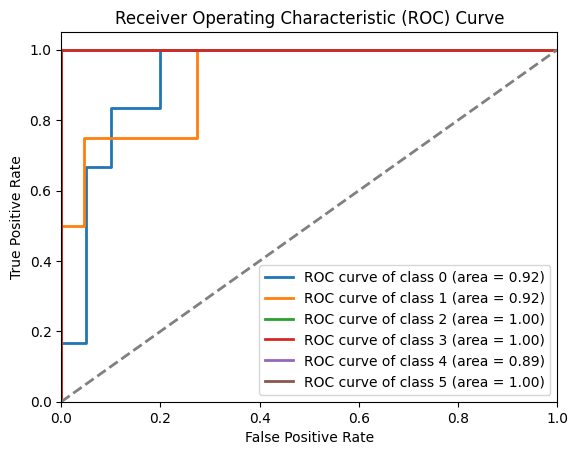

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
Overall Test Set AUC-ROC Score (Macro-Average): 0.96
Test Set AUC-ROC Scores:
Class 0: AUC = 0.94
Class 1: AUC = 0.86
Class 2: AUC = 1.00
Class 3: AUC = 1.00
Class 4: AUC = 0.95
Class 5: AUC = 1.00


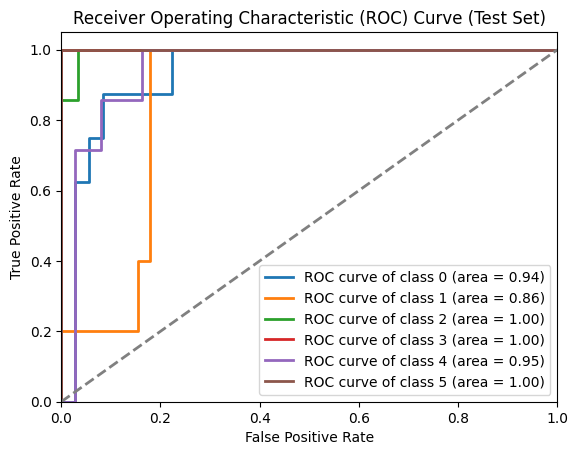

In [ ]:
# # Store the ROC curve information
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# num_classes = len(np.unique(y_all))

# # Perform cross-validation
# valid_folds = 0
# for train_index, val_index in kf.split(x_all):
#     x_train_cv, x_val_cv = x_all[train_index], x_all[val_index]
#     y_train_cv, y_val_cv = y_all[train_index], y_all[val_index]

#     # Check if the validation set contains only one class
#     if len(np.unique(y_val_cv)) == 1:
#         print(f"Skipping fold with only one class in validation set: {np.unique(y_val_cv)}")
#         continue

#     # Create a new instance of the CNN model for each fold
#     cnn_model = create_cnn_model(input_shape=(x_train_cv.shape[1], 1), num_classes=num_classes)

#     # Train the model
#     cnn_model.fit(x_train_cv, y_train_cv, epochs=50, batch_size=32, validation_data=(x_val_cv, y_val_cv), verbose=0)

#     # Predict probabilities on the validation set
#     y_val_prob = cnn_model.predict(x_val_cv)

#     # Binarize the validation labels
#     y_val_bin = label_binarize(y_val_cv, classes=np.arange(num_classes))

#     # Compute ROC curve and AUC for each class
#     for i in range(num_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_prob[:, i])
#         if len(np.unique(y_val_bin[:, i])) > 1:
#             roc_auc[i] = roc_auc_score(y_val_bin[:, i], y_val_prob[:, i])
#         else:
#             print(f"Skipping ROC AUC calculation for class {i} in this fold due to single class in true labels.")

#     valid_folds += 1

# if valid_folds == 0:
#     print("No valid folds found. Exiting.")
#     exit()

# # Calculate overall AUC-ROC value (macro-average)
# overall_auc = np.mean(list(roc_auc.values()))
# print(f"Overall Cross-Validation AUC-ROC Score (Macro-Average): {overall_auc:.2f}")

# # Print AUC-ROC values for cross-validation
# print("Cross-Validation AUC-ROC Scores:")
# for i in range(num_classes):
#     if i in roc_auc:
#         print(f'Class {i}: AUC = {roc_auc[i]:.2f}')

# # Plot ROC curves
# plt.figure()
# for i in range(num_classes):
#     if i in roc_auc:
#         plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

# plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

# # Evaluate the model on the test set for final test AUC-ROC
# y_test_prob = cnn_model.predict(x_test_all)
# y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))

# # Compute ROC curve and AUC for each class
# for i in range(num_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
#     if len(np.unique(y_test_bin[:, i])) > 1:
#         roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_test_prob[:, i])
#     else:
#         print(f"Skipping ROC AUC calculation for class {i} in test set due to single class in true labels.")

# # Calculate overall AUC-ROC value for the test set (macro-average)
# overall_test_auc = np.mean(list(roc_auc.values()))
# print(f"Overall Test Set AUC-ROC Score (Macro-Average): {overall_test_auc:.2f}")

# # Print AUC-ROC values for the test set
# print("Test Set AUC-ROC Scores:")
# for i in range(num_classes):
#     if i in roc_auc:
#         print(f'Class {i}: AUC = {roc_auc[i]:.2f}')

# # Plot ROC curves for test set
# plt.figure()
# for i in range(num_classes):
#     if i in roc_auc:
#         plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

# plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
# plt.legend(loc="lower right")
# plt.show()

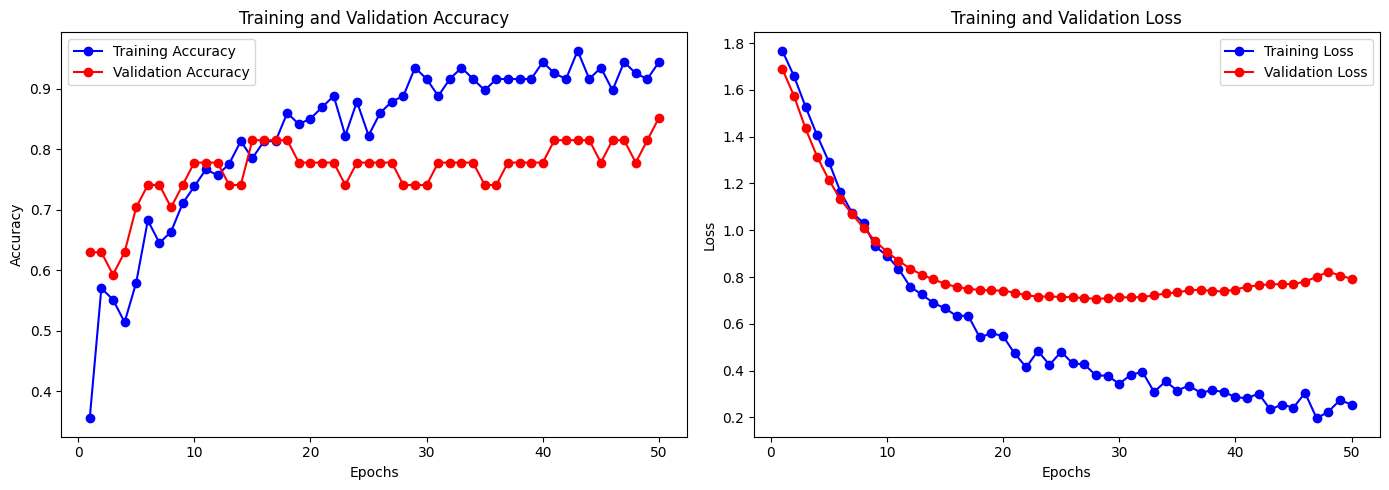

In [ ]:
# Extract values from the history object
epochs = range(1, len(history_CNN.history['accuracy']) + 1)
train_acc = history_CNN.history['accuracy']
val_acc = history_CNN.history['val_accuracy']
train_loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[ 4  2  0  0  2  0]
 [ 2  3  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  1  0  6  0]
 [ 0  0  0  0  0  2]]


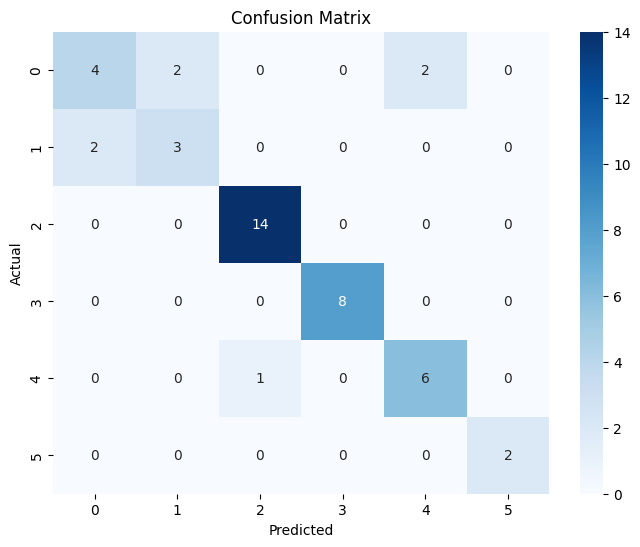

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.60      0.60      0.60         5
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8
           4       0.75      0.86      0.80         7
           5       1.00      1.00      1.00         2

    accuracy                           0.84        44
   macro avg       0.83      0.83      0.82        44
weighted avg       0.83      0.84      0.83        44



In [ ]:
# Make predictions
predictions = cnn_model.predict(x_test_all_CNN)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
print(cm)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)


# **MLP Model**

In [ ]:
x_train_MLP = x_train
x_test_MLP = x_test
y_train_MLP = y_train
y_test_MLP = y_test

In [ ]:
x_train_MLP, x_val_MLP, y_train_MLP, y_val_MLP = train_test_split(x_train_MLP, y_train_MLP, test_size=0.2, random_state=42, stratify=y_train_MLP)

# Create TensorFlow datasets
train_dataset_MLP = tf.data.Dataset.from_tensor_slices((x_train_MLP.toarray(), y_train_MLP))
val_dataset_MLP = tf.data.Dataset.from_tensor_slices((x_val_MLP.toarray(), y_val_MLP))
test_dataset_MLP = tf.data.Dataset.from_tensor_slices((x_test_MLP.toarray(), y_test_MLP))

# Shuffle and batch the datasets
train_dataset_MLP = train_dataset_MLP.batch(batch_size)
val_dataset_MLP = val_dataset_MLP.batch(batch_size)
test_dataset_MLP = test_dataset_MLP.batch(batch_size)

In [ ]:
# Define the MLP model with additional hidden layers and adjusted dropout rates
mlp_model = Sequential()
mlp_model.add(Dense(128, activation='relu', input_shape=(x_train_MLP.shape[1],)))
mlp_model.add(Dropout(0.5))  # Adding dropout for regularization
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dropout(0.5))

# Additional hidden layers with dropout
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dropout(0.4))
mlp_model.add(Dense(16, activation='relu'))
mlp_model.add(Dropout(0.3))

# Output layer, number of units equal to the number of classes
num_classes = len(np.unique(y_train_MLP))
mlp_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the MLP model
history_MLP = mlp_model.fit(train_dataset_MLP, epochs=50, validation_data=val_dataset_MLP)

# Train accuracy
train_accuracy = history_MLP.history['accuracy'][-1]
print(f'Train Accuracy: {train_accuracy:.4f}')

# Validation accuracy
val_loss, val_accuracy = mlp_model.evaluate(val_dataset_MLP)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Test accuracy
test_loss, test_accuracy = mlp_model.evaluate(test_dataset_MLP)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate AUC-ROC on the test set
y_test_pred_proba = mlp_model.predict(test_dataset_MLP)
y_test_true = np.concatenate([y for x, y in test_dataset_MLP], axis=0)
auc_roc = roc_auc_score(y_test_true, y_test_pred_proba, multi_class='ovr')
print(f'AUC-ROC: {auc_roc:.4f}')

# Cross-validation using Stratified K-Fold
x_all_MLP = np.concatenate((x_train_MLP.toarray(), x_test_MLP.toarray()), axis=0)
y_all_MLP = np.concatenate((y_train_MLP, y_test_MLP), axis=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracies = []

for train_index, val_index in skf.split(x_all_MLP, y_all_MLP):
    x_train_cv, x_val_cv = x_all_MLP[train_index], x_all_MLP[val_index]
    y_train_cv, y_val_cv = y_all_MLP[train_index], y_all_MLP[val_index]

    # Define the MLP model (same as above)
    model_cv = Sequential()
    model_cv.add(Dense(128, activation='relu', input_shape=(x_train_cv.shape[1],)))
    model_cv.add(Dropout(0.5))
    model_cv.add(Dense(64, activation='relu'))
    model_cv.add(Dropout(0.5))
    model_cv.add(Dense(32, activation='relu'))
    model_cv.add(Dropout(0.4))
    model_cv.add(Dense(16, activation='relu'))
    model_cv.add(Dropout(0.3))
    model_cv.add(Dense(num_classes, activation='softmax'))

    model_cv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_cv.fit(x_train_cv, y_train_cv, epochs=50, batch_size=batch_size, verbose=0)

    val_loss_cv, val_accuracy_cv = model_cv.evaluate(x_val_cv, y_val_cv, verbose=0)
    cross_val_accuracies.append(val_accuracy_cv)

mean_cross_val_accuracy = np.mean(cross_val_accuracies)
print(f'Cross-Validation Accuracy: {mean_cross_val_accuracy:.4f}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.1026 - loss: 1.8064 - val_accuracy: 0.2222 - val_loss: 1.7861
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2563 - loss: 1.7905 - val_accuracy: 0.2963 - val_loss: 1.7752
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1598 - loss: 1.7980 - val_accuracy: 0.2963 - val_loss: 1.7664
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1618 - loss: 1.7846 - val_accuracy: 0.3704 - val_loss: 1.7581
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2072 - loss: 1.7660 - val_accuracy: 0.3704 - val_loss: 1.7505
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1685 - loss: 1.7879 - val_accuracy: 0.3333 - val_loss: 1.7449
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2845 - loss: 1.7419 - val_accuracy: 0.4444 - val_loss: 1.7377
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3881 - loss: 1.7362 - val_accuracy: 0.4815 - val_loss: 1.7286
Epoch 9/50
4/4 ━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation Accuracy: 0.6559


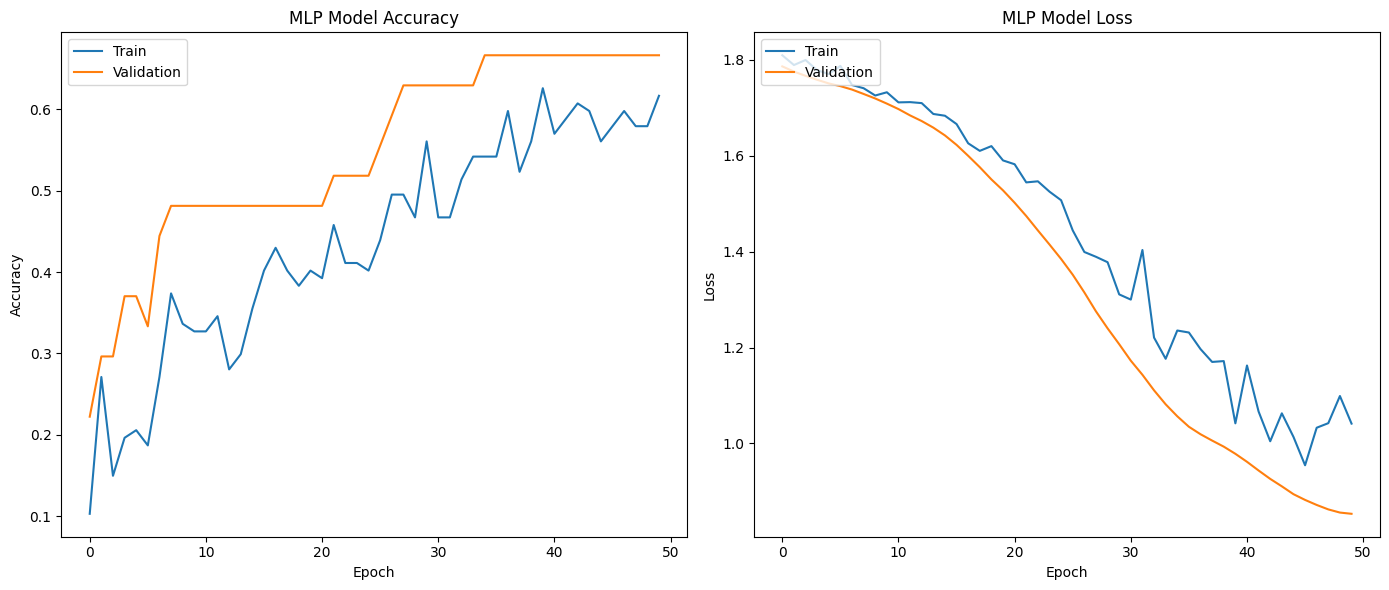

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_MLP.history['accuracy'])
plt.plot(history_MLP.history['val_accuracy'])
plt.title('MLP Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('MLP Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[ 7  0  0  1  0  0]
 [ 4  0  0  1  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 4  0  3  0  0  0]
 [ 0  0  1  1  0  0]]


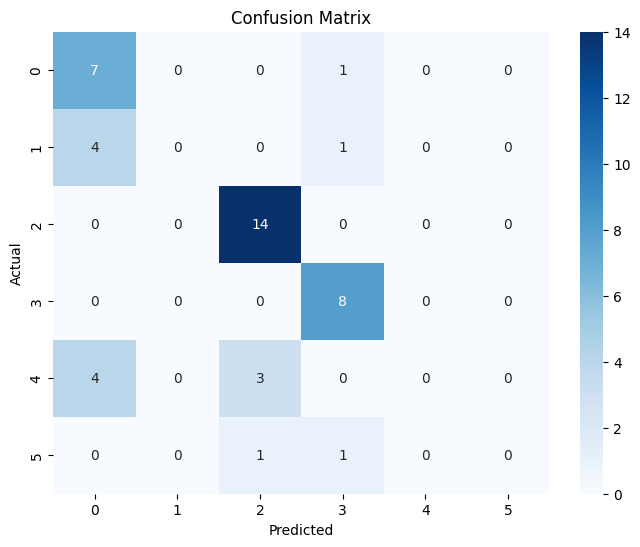

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           1       0.00      0.00      0.00         5
           2       0.78      1.00      0.88        14
           3       0.73      1.00      0.84         8
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2

    accuracy                           0.66        44
   macro avg       0.33      0.48      0.39        44
weighted avg       0.46      0.66      0.54        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Make predictions
predictions = mlp_model.predict(test_dataset_MLP)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
print(cm)
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)

In [ ]:
precision_mlp, recall_mlp, f1_mlp, support_mlp = precision_recall_fscore_support(y_test_MLP, predicted_labels, average=None)

# Compute weighted average
weighted_precision_mlp = np.sum(precision_mlp * support_mlp) / np.sum(support_mlp)
weighted_recall_mlp = np.sum(recall_mlp * support_mlp) / np.sum(support_mlp)
weighted_f1_mlp = np.sum(f1_mlp * support_mlp) / np.sum(support_mlp)

print(f"Weighted Precision for MLP: {weighted_precision_mlp}")
print(f"Weighted Recall for MLP: {weighted_recall_mlp}")
print(f"Weighted F1-Score for MLP: {weighted_f1_mlp}")

Weighted Precision for MLP: 0.46455463728191
Weighted Recall for MLP: 0.6590909090909091
Weighted F1-Score for MLP: 0.5421910755148741


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **LSTM**

In [ ]:
x_train_LSTM = x_train
x_test_LSTM = x_test
y_train_LSTM = y_train
y_test_LSTM = y_test

In [ ]:
from tensorflow.keras.layers import LSTM

# Reshape data for LSTM (assuming a 3D input)
x_train_all_lstm = x_train_LSTM.toarray().reshape(x_train_LSTM.shape[0], 1, x_train_LSTM.shape[1])
x_test_all_lstm = x_test_LSTM.toarray().reshape(x_test_LSTM.shape[0], 1, x_test_LSTM.shape[1])


x_train_all_lstm, x_val_all_lstm, y_train_LSTM, y_val_LSTM = train_test_split(x_train_all_lstm, y_train_LSTM, test_size=0.2, random_state=42, stratify=y_train_LSTM)

In [ ]:
# Define batch size
batch_size_lstm = 32
# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(1, x_train_all_lstm.shape[2])))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))
num_classes_lstm = len(np.unique(y_train_LSTM))
lstm_model.add(Dense(num_classes_lstm, activation='softmax'))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model and calculate training accuracy
history_LSTM = lstm_model.fit(x_train_all_lstm, y_train_LSTM, epochs=50, batch_size=batch_size_lstm, validation_data=(x_val_all_lstm, y_val_LSTM))

# Training accuracy
train_accuracy_lstm = history_LSTM.history['accuracy'][-1]
val_accuracy_lstm = history_LSTM.history['val_accuracy'][-1]

# Evaluate the LSTM model on the test set
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(x_test_all_lstm, y_test_LSTM)

# Cross-validation using Stratified K-Fold
x_all_lstm = np.concatenate((x_train_all_lstm, x_test_all_lstm), axis=0)
y_all_lstm = np.concatenate((y_train_LSTM, y_test_LSTM), axis=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracies_lstm = []
auc_roc_scores_lstm = []

for train_index, val_index in skf.split(x_all_lstm, y_all_lstm):
    x_train_cv_lstm, x_val_cv_lstm = x_all_lstm[train_index], x_all_lstm[val_index]
    y_train_cv_lstm, y_val_cv_lstm = y_all_lstm[train_index], y_all_lstm[val_index]

    # Define the LSTM model
    model_cv_lstm = Sequential()
    model_cv_lstm.add(LSTM(units=64, input_shape=(1, x_train_cv_lstm.shape[2])))
    model_cv_lstm.add(Dropout(0.5))
    model_cv_lstm.add(Dense(64, activation='relu'))
    model_cv_lstm.add(Dropout(0.5))
    model_cv_lstm.add(Dense(num_classes_lstm, activation='softmax'))

    model_cv_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_cv_lstm.fit(x_train_cv_lstm, y_train_cv_lstm, epochs=50, batch_size=batch_size_lstm, verbose=0)

    val_loss_cv_lstm, val_accuracy_cv_lstm = model_cv_lstm.evaluate(x_val_cv_lstm, y_val_cv_lstm, verbose=0)
    cross_val_accuracies_lstm.append(val_accuracy_cv_lstm)

    # Predict probabilities for AUC-ROC calculation
    y_val_pred_proba_cv_lstm = model_cv_lstm.predict(x_val_cv_lstm)
    auc_roc_cv_lstm = roc_auc_score(y_val_cv_lstm, y_val_pred_proba_cv_lstm, multi_class='ovr')
    auc_roc_scores_lstm.append(auc_roc_cv_lstm)

mean_cross_val_accuracy_lstm = np.mean(cross_val_accuracies_lstm)
mean_auc_roc_lstm = np.mean(auc_roc_scores_lstm)

# Print the results
print(f'LSTM Model Train Accuracy: {train_accuracy_lstm:.4f}')
print(f'LSTM Model Validation Accuracy: {val_accuracy_lstm:.4f}')
print(f'LSTM Model Test Accuracy: {test_accuracy_lstm:.4f}')
print(f'LSTM Model Cross-Validation Accuracy: {mean_cross_val_accuracy_lstm:.4f}')
print(f'LSTM Model AUC-ROC Percentage: {mean_auc_roc_lstm * 100:.2f}%')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.1964 - loss: 1.7875 - val_accuracy: 0.4444 - val_loss: 1.7808
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2696 - loss: 1.7773 - val_accuracy: 0.4444 - val_loss: 1.7733
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3152 - loss: 1.7717 - val_accuracy: 0.3333 - val_loss: 1.7654
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4424 - loss: 1.7532 - val_accuracy: 0.3333 - val_loss: 1.7564
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4099 - loss: 1.7454 - val_accuracy: 0.3333 - val_loss: 1.7462
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3937 - loss: 1.7335 - val_accuracy: 0.3333 - val_loss: 1.7346
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3857 - loss: 1.7314 - val_accuracy: 0.3333 - val_loss: 1.7219
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3549 - loss: 1.7075 - val_accuracy: 0.3333 - val_loss: 1.7078
Epoch 9/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
LSTM Model Train Accuracy: 0.7196
LSTM Model Validation Accuracy: 0.7407
LSTM Model Test Accuracy: 0.7727
LSTM Model Cross-Validation Accuracy: 0.8082
LSTM Model AUC-ROC Percentage: 94.64%


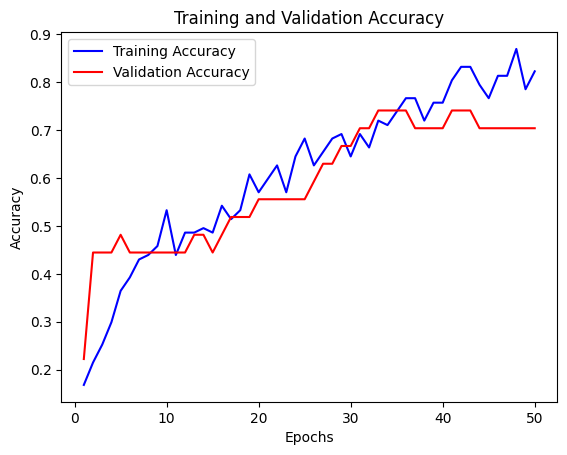

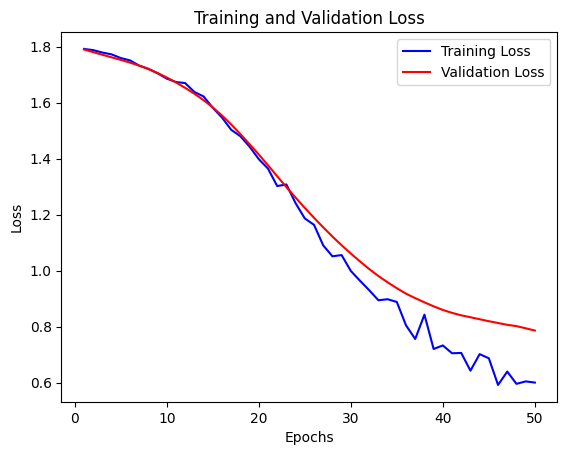

In [ ]:
# Extract training and validation accuracy and loss from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create learning curves
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
[[ 7  1  0  0  0  0]
 [ 4  0  0  0  1  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 2  0  1  1  3  0]
 [ 0  0  0  0  0  2]]


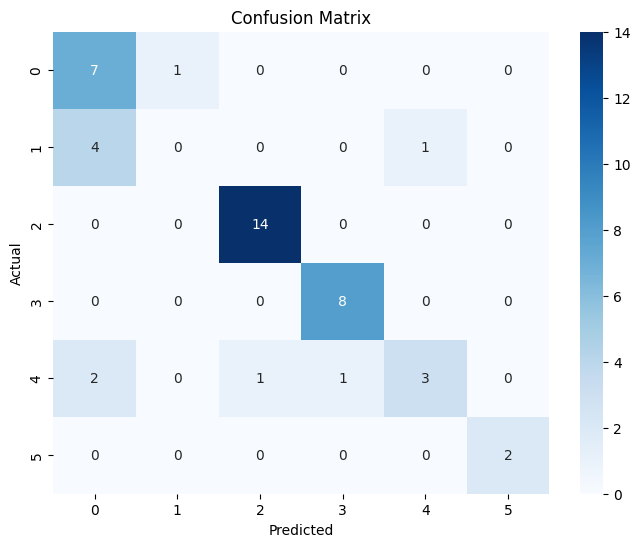

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.00      0.00      0.00         5
           2       0.93      1.00      0.97        14
           3       0.89      1.00      0.94         8
           4       0.75      0.43      0.55         7
           5       1.00      1.00      1.00         2

    accuracy                           0.77        44
   macro avg       0.69      0.72      0.69        44
weighted avg       0.72      0.77      0.73        44



In [ ]:
# Make predictions
predictions = lstm_model.predict(x_test_all_lstm)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
print(cm)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)

In [ ]:
# Compute precision, recall, and f1-score for each class
precision_lstm, recall_lstm, f1_lstm, support_lstm = precision_recall_fscore_support(y_test, predicted_labels, average=None)

# Compute weighted average
weighted_precision_lstm = np.sum(precision_lstm * support_lstm) / np.sum(support_lstm)
weighted_recall_lstm = np.sum(recall_lstm * support_lstm) / np.sum(support_lstm)
weighted_f1_lstm = np.sum(f1_lstm * support_lstm) / np.sum(support_lstm)

print(f"Weighted Precision for lstm: {weighted_precision_lstm}")
print(f"Weighted Recall for lstm: {weighted_recall_lstm}")
print(f"Weighted F1-Score for lstm: {weighted_f1_lstm}")

p_lstm = round(weighted_precision_lstm * 100, 2)
r_lstm = round(weighted_recall_lstm * 100, 2)
f1_lstm = round(weighted_f1_lstm * 100, 2)

Weighted Precision for lstm: 0.7212606837606838
Weighted Recall for lstm: 0.7727272727272727
Weighted F1-Score for lstm: 0.7317765521711675
